## Q4: K-Means Clustering (Unsupervised Task)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### (b) Pre-processing

In [3]:
df = df.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
})


In [4]:
scaler = StandardScaler()
X = df[['Annual Income', 'Spending Score']].values
X_scaled = scaler.fit_transform(X)

### (c) Apply K-Means clustering

In [5]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [6]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

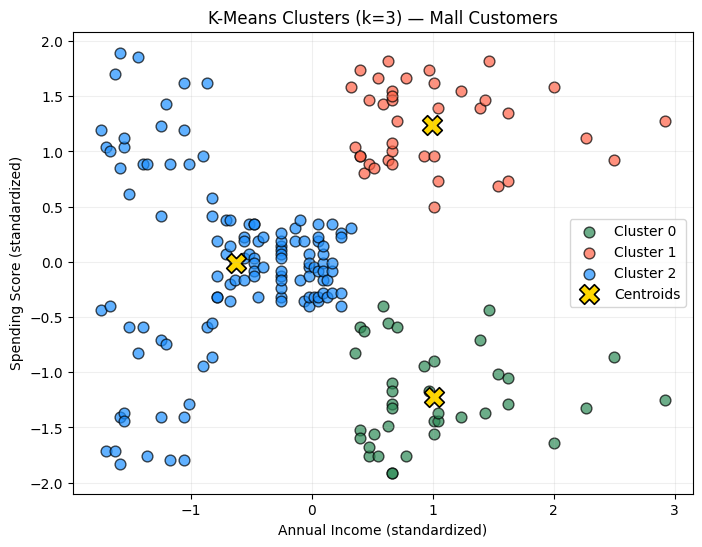

In [7]:
plt.figure(figsize=(8,6))
palette = ['#2E8B57', '#FF6347', '#1E90FF']
for i in range(k):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1],
                s=60, c=palette[i], label=f'Cluster {i}', alpha=0.7, edgecolor='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200,
            c='gold', edgecolor='k', linewidth=1.2, label='Centroids')

plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.title(f'K-Means Clusters (k={k}) — Mall Customers')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [8]:
print("Inertia (sum of squared distances to centroids):", kmeans.inertia_)

Inertia (sum of squared distances to centroids): 157.70400815035947


### (d) Evaluate the clustering

In [9]:
k = 3   
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

print("Inertia Score:", kmeans.inertia_)

Inertia Score: 157.70400815035947


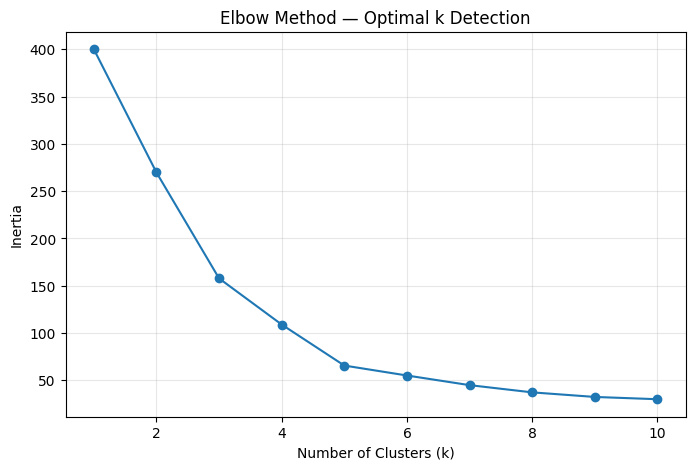

In [10]:
inertias = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method — Optimal k Detection')
plt.grid(alpha=0.3)
plt.show()


### (e) If If true labels exist 


In [11]:
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score (k={k}): {sil_score:.4f}")

Silhouette Score (k=10): 0.4666


C:\Users\daksh\AppData\Local\Temp\ipykernel_16276\2415325610.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10")


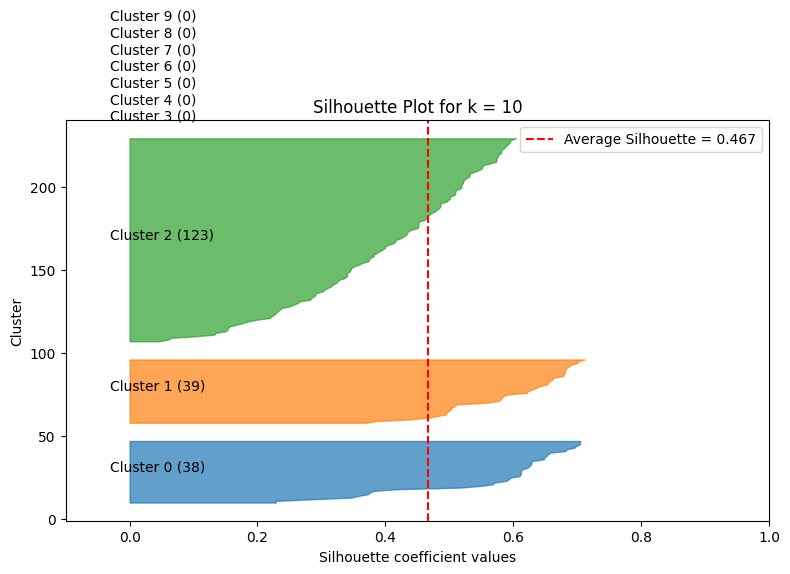

In [12]:
if k <= 1 or k >= len(X_scaled):
    print("Silhouette plot not available for k <=1 or k >= n_samples.")
else:
    sample_sil_values = silhouette_samples(X_scaled, labels)
    y_lower = 10
    plt.figure(figsize=(8, 6))
    cmap = cm.get_cmap("tab10")

    for i in range(k):
        ith_cluster_sil_vals = sample_sil_values[labels == i]
        ith_cluster_sil_vals.sort()
        size_cluster_i = ith_cluster_sil_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(i)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_sil_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.03, y_lower + 0.5 * size_cluster_i, f"Cluster {i} ({size_cluster_i})", fontsize=10)
        y_lower = y_upper + 10  

    plt.axvline(x=sil_score, color="red", linestyle="--", label=f"Average Silhouette = {sil_score:.3f}")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster")
    plt.title(f"Silhouette Plot for k = {k}")
    plt.legend(loc="upper right")
    plt.xlim([-0.1, 1])
    plt.tight_layout()
    plt.show()